In [1]:
import igraph
import copy
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

%matplotlib inline

In [2]:
path_to_matrices = "matrix_csvs/"
years = ["2004"] + ["2007"] + [str(i) for i in range(2014,2018)] #list of all years
quarters = [".0", ".25", ".5", ".75"] #list of all quarters

In [3]:
#Stating period for analisis
y_index = -2
q_index = 3
current_year = years[y_index] + quarters[q_index] #The year and quarter we will do the analisis for

#Importing the files needed
df_all = pd.read_csv(path_to_matrices + current_year + "_all_projection.csv")
names = list(df_all.columns[1:]) #Getting names of nodes
n_countries = len(names)
ADJ_all = np.loadtxt(open(path_to_matrices + current_year + "_all_projection.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
#files are empty
#pd.read_csv(path_to_matrices + current_year + "_blue_projection.csv")
#Adjmat_blue = np.loadtxt(open(path_to_matrices + current_year + "_blue_projection.csv", "rb"), delimiter=",", skiprows=1, 
           #usecols=range(1,n_countries+1)) #getting the adjacency matrix
#Adjmat_green = np.loadtxt(open(path_to_matrices + current_year + "_green_projection.csv", "rb"), delimiter=",", skiprows=1, 
           #usecols=range(1,n_countries+1)) #getting the adjacency matrix

Note, in year 2004 there is hardly little influence between countries. In year 2017 there is more, although still not a lot (think?)

[ 0.99491988  0.99301802  0.95294638  0.98995231  0.994774    0.9971492   1.
  0.99677407  1.          0.99928412  0.96970739  0.98337676  0.96914073
  0.98641286  0.97608882  1.          0.99930476  0.96763545  0.9882261
  0.97191811  0.94838996  0.9927519   0.975548    0.95498977  0.97227757
  0.97827807  0.98269697  0.93501431  0.99624137  0.99678992  0.9995454   1.
  0.99623885  1.          0.99962324  0.99972414  0.95482607  0.92687648
  0.99978102  0.98821806  0.92520875  0.99821342  0.987664    0.9888254
  0.99310432  1.          1.          0.97202202  0.99852459  0.95540232
  0.9404247   1.          0.99888933  0.99825003  0.99758154  0.9982448
  0.88452098  0.99008067  1.          1.          0.99531338  0.93036645
  0.97175656  0.99430773  0.9457979   0.99335935  0.97417429  0.9982804
  0.99995183  0.97617505  1.          0.9806443   1.          0.99343412
  1.          0.97872674  0.99892541  0.9993448   0.92036482  0.99550292
  0.93512529  0.96416178  1.          0.9978619

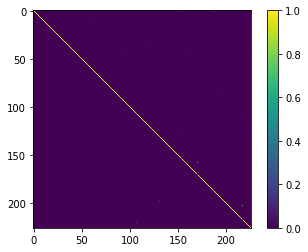

In [4]:
print(np.diagonal(ADJ_all)) #Is this correct? A "1" in the diagonal would indicate the country is not influenced
#by any other country?
plt.imshow(ADJ_all) #Few influence between countries?
plt.colorbar()

In [5]:
#This is an isolated node.
ADJ_all[0]

array([  9.94919883e-01,   1.87760912e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.83378125e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.03177672e-06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.77391143e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [6]:
#Only small countries can be influenced?
print("Small diagonal value")
for i in range(n_countries):
    if np.diagonal(ADJ_all)[i] < 0.5:
        print i, " ", names[i]

Small diagonal value
170   MF
217   GS


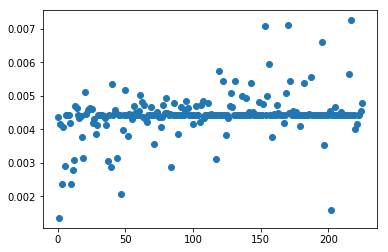

In [8]:
#PageRank centrality with igraph
G_all =  igraph.Graph.Weighted_Adjacency(ADJ_all.tolist() ,mode="directed")
pr_all = G_all.personalized_pagerank(weights=G_all.es["weight"], directed=True)
names_copy = copy.copy(names)
inds = np.array(pr_all).argsort()[::-1][:]
sort_names_pr = np.array(names_copy)[inds]
sort_centrality_pr = np.array(pr_all)[inds]
sort_names_pr, sort_centrality_pr
plt.plot(pr_all, "o")

### Loading matrices and making projections

In [9]:
#Extracting bipartite adj mat
ADJ_bip_green = np.loadtxt(open(path_to_matrices + current_year + "_green_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
ADJ_bip_blue = np.loadtxt(open(path_to_matrices + current_year + "_blue_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
#Does the all category include the green and blue or is it just the dirty ones? In principle we would like to have 
#only the dirty ones, right?
ADJ_bip_all = np.loadtxt(open(path_to_matrices + current_year + "_all_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) 
#To get the high emission plants we use the all matrix and remove the "clean" part
ADJ_bip_dirty = ADJ_bip_all - (ADJ_bip_green + ADJ_bip_blue)


#Making the company projection
ADJ_comp_green =  (ADJ_bip_green/ADJ_bip_green.sum()).dot(ADJ_bip_green.T/(ADJ_bip_green.T.sum()))
ADJ_comp_blue =  (ADJ_bip_blue/ADJ_bip_blue.sum()).dot(ADJ_bip_blue.T/(ADJ_bip_blue.T.sum()))
ADJ_comp_all =  (ADJ_bip_all/ADJ_bip_all.sum()).dot(ADJ_bip_all.T/(ADJ_bip_all.T.sum()))
ADJ_comp_dirty =  (ADJ_bip_dirty /ADJ_bip_dirty .sum()).dot(ADJ_bip_dirty.T/(ADJ_bip_dirty .T.sum()))
#Making the country projection
ADJ_country_green =  (ADJ_bip_green.T/ADJ_bip_green.T.sum()).dot(ADJ_bip_green/(ADJ_bip_green.sum()))
ADJ_country_blue =  (ADJ_bip_blue.T/ADJ_bip_blue.T.sum()).dot(ADJ_bip_blue/(ADJ_bip_blue.sum()))
ADJ_country_all =  (ADJ_bip_all.T/ADJ_bip_all.T.sum()).dot(ADJ_bip_all/(ADJ_bip_all.sum()))
ADJ_country_dirty =  (ADJ_bip_dirty.T /ADJ_bip_dirty.T .sum()).dot(ADJ_bip_dirty/(ADJ_bip_dirty.sum()))

#Getting the percentage of emissions of each type for each country
green_part = [sum(ADJ_bip_green[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
blue_part = [sum(ADJ_bip_blue[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
dirty_part = [sum(ADJ_bip_dirty[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]

IndexError: list index out of range

# Multilayer analysis

In [10]:

def make_supra_adj(ADJ_list, COUP_list):
    """Function that takes list of adj matrix and coupling and generates the supra adjacency matrix of the
    multiplex network
    Args:
        ADJ_list: list of numpy 2D array's. Each of them is an adjacency matrix
        COUP_list: list of numpy 1D array's. Each of them is the vector to be used for coupling the matrices
    Return:
        Supra Adjacency matrix. Numpy 2D array.
    """
    n_layers = len(ADJ_list)
    n_nodes = ADJ_list[0].shape[0]
    
    #stacking up adjacency matrix and coupling accordingly
    sup_list = []
    for i in range(n_layers):
        row = []
        for j in range(n_layers):
            if i == j: #if in diagonal add adjacency matrix
                row.append(ADJ_list[i])
                #print(ADJ_list[i].shape)
            else: #otherwise add the coupling (diagonal since multiplex network)
                row.append(np.diag(COUP_list[i])) #if i or j here defined direction of coupling
                #print(np.diag(COUP_list[i]).shape)
        sup_list.append(row)
        
    return np.bmat(sup_list)
    
n_nodes = n_countries
n_layers = 3
#The following function is taylored for igraph centrality
def flatten_centrality(centrality_vector, n=n_nodes, l=n_layers, names=names, hubauth=False):
    '''Centrality networks in a Multiplex are commonly expressed as a vector of
    nlx1 dimension. To have a centrality for each node it is important to flatten
    the vector into nx1 dimension. Also, it is important return a list of ranked
    nodes and another of their score.
    Args
    centrality_vector(numpy array): the centrality measure for each node-layer
    n(int): number of nodes
    l(int): number of layers
    names(list of strings): name of nodes (countries)
    hubauth(boolean): indicating if the centrality is hub or authority
    Return:
    sort_names_multi(list of strings): names of countries ordered by centrality
    sort_centrality_multi(list of flots): sorted score of nodes
    '''
    multi_centrality = []
    for i in range(n):
        cent = 0
        for k in range(l):
            cent += centrality_vector[i + n*k]
        if hubauth:
            multi_centrality.append(cent[0])
        else:
            multi_centrality.append(cent)
    node_names = np.array(copy.deepcopy(names))
    inds = np.array(multi_centrality).argsort()[::-1][:]
    sort_names_multi = node_names[inds]
    sort_centrality_multi = np.array(multi_centrality)[inds]
    
    return sort_names_multi, sort_centrality_multi    


In [11]:
#Making the supra adjacency matrix
SUPADJ_country = make_supra_adj([ADJ_country_green, ADJ_country_blue, ADJ_country_dirty], [green_part, blue_part, dirty_part]) 

NameError: name 'ADJ_country_green' is not defined

In [12]:
#making the graph
G_supra = igraph.Graph.Weighted_Adjacency( SUPADJ_country.tolist() ,mode="directed") 
#computing pagerank
pr_muliplex = G_supra.personalized_pagerank(weights=G_supra.es["weight"])
#sorting it appropriately
pr_multiplex_sorted = flatten_centrality(pr_muliplex)

NameError: name 'SUPADJ_country' is not defined

In [13]:
pr_multiplex_sorted

NameError: name 'pr_multiplex_sorted' is not defined

Comparing it with the aggregate pagerank centrality

In [12]:
G_all =  igraph.Graph.Weighted_Adjacency( ADJ_all.tolist() ,mode="directed")
pr_all = G_all.personalized_pagerank(weights=G_all.es["weight"])
names_copy = copy.copy(names)
inds = np.array(pr_all).argsort()[:]
#If small countries are first, try including the [::-1 as below]
#inds = np.array(pr_all).argsort()[::-1][:]
sort_names_pr = np.array(names_copy)[inds]
sort_centrality_pr = np.array(pr_all)[inds]

In [13]:
sort_names_pr, sort_centrality_pr

(array(['US', 'FR', 'BR', 'MX', 'IN', 'ES', 'PK', 'SA', 'VN', 'CL', 'GB',
        'EG', 'CN', 'PT', 'PL', 'DE', 'ZA', 'MM', 'PE', 'CA', 'BD', 'IT',
        'RO', 'BG', 'AE', 'RU', 'SE', 'NL', 'KZ', 'OM', 'NO', 'IL', 'ID',
        'GH', 'JP', 'CR', 'MY', 'AU', 'TR', 'DZ', 'TJ', 'ME', 'YE', 'NZ',
        'LV', 'CU', 'AO', 'CY', 'KP', 'PG', 'EE', 'SI', 'UZ', 'RS', 'LT',
        'CD', 'BH', 'IS', 'KW', 'SS', 'TZ', 'CZ', 'SD', 'AL', 'AR', 'TH',
        'SY', 'ZM', 'MK', 'CH', 'ET', 'TM', 'IR', 'MZ', 'SK', 'KG', 'MD',
        'AT', 'BY', 'NP', 'VE', 'ZW', 'LK', 'TN', 'QA', 'AZ', 'LB', 'TW',
        'GR', 'LY', 'IQ', 'PH', 'BA', 'SG', 'NG', 'KR', 'BE', 'CO', 'MA',
        'HR', 'FI', 'KE', 'UY', 'UA', 'HU', 'DK', 'GT', 'IE', 'DO', 'LA',
        'BT', 'EH', 'JO', 'HT', 'RE', 'GP', 'MQ', 'HN', 'KH', 'PA'], 
       dtype='|S2'),
 array([ 0.00208513,  0.00237654,  0.00243707,  0.00262046,  0.00292486,
         0.00314372,  0.00330031,  0.00343078,  0.00372804,  0.00380639,
         0.00410278,  0

# Inconsistency between networkx and igraph?
I tend to trust igraph more, however the discrepancy might mean that values in general are too close. Perhaps networkx power method is not converging?

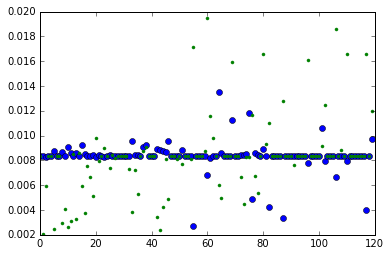

In [14]:
#PageRank centrality with igraph
G_all =  igraph.Graph.Weighted_Adjacency(ADJ_all.tolist() ,mode="directed")
pr_all = G_all.personalized_pagerank(weights=G_all.es["weight"], directed=True)
names_copy = copy.copy(names)
#inds = np.array(pr_all).argsort()[::-1][:]
inds = np.array(pr_all).argsort()[:]
sort_names_pr = np.array(names_copy)[inds]
sort_centrality_pr = np.array(pr_all)[inds]
sort_names_pr, sort_centrality_pr

#PageRank centrality with networkx
G_all_nx = nx.from_numpy_matrix(ADJ_all)
pr_all_nx = nx.pagerank(G_all_nx, weight="weight")
plt.plot(pr_all_nx.values(), "o")
plt.plot(pr_all, ".")

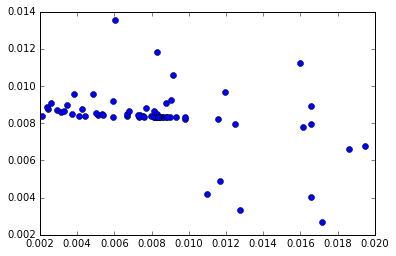

In [15]:
plt.plot(pr_all, pr_all_nx.values(), "o")

In [16]:
for i in range(n_countries):
    print i, "nx = ", names[sorted(pr_all_nx.items(), key=lambda x:x[1])[::-1][i][0]], "ig = ", sort_names_pr[i]

0 nx =  BD ig =  US
1 nx =  CR ig =  FR
2 nx =  JO ig =  BR
3 nx =  UY ig =  MX
4 nx =  LA ig =  IN
5 nx =  CL ig =  ES
6 nx =  PT ig =  PK
7 nx =  KE ig =  SA
8 nx =  PE ig =  VN
9 nx =  MX ig =  CL
10 nx =  MA ig =  GB
11 nx =  SA ig =  EG
12 nx =  RE ig =  CN
13 nx =  FR ig =  PT
14 nx =  OM ig =  PL
15 nx =  EG ig =  DE
16 nx =  BR ig =  ZA
17 nx =  IN ig =  MM
18 nx =  GH ig =  PE
19 nx =  PK ig =  CA
20 nx =  BG ig =  BD
21 nx =  ES ig =  IT
22 nx =  PL ig =  RO
23 nx =  MY ig =  BG
24 nx =  VN ig =  AE
25 nx =  ZA ig =  RU
26 nx =  RO ig =  SE
27 nx =  SE ig =  NL
28 nx =  AE ig =  KZ
29 nx =  DE ig =  OM
30 nx =  MM ig =  NO
31 nx =  NO ig =  IL
32 nx =  CN ig =  ID
33 nx =  US ig =  GH
34 nx =  GB ig =  JP
35 nx =  NL ig =  CR
36 nx =  IT ig =  MY
37 nx =  HU ig =  AU
38 nx =  IL ig =  TR
39 nx =  KZ ig =  DZ
40 nx =  RU ig =  TJ
41 nx =  CO ig =  ME
42 nx =  BA ig =  YE
43 nx =  ID ig =  NZ
44 nx =  TR ig =  LV
45 nx =  JP ig =  CU
46 nx =  GR ig =  AO
47 nx =  SG ig =  CY
48

In [66]:
#If we want to do Hubs and Auth the following code will be usefull
"""def G_list_hub(G_adj_list):
    '''
    Args(list): list of graphs adjacency matrices
    Return(list): list of adjacency matrices to be used in the block diagonal
    of the supra adjacency matrix for hub score
    '''
    G_hub = []
    for g in G_adj_list:
        new = np.dot(g, g.transpose())
        G_hub.append(new)
    return G_hub

def G_list_auth(G_adj_list):
    '''
    Args(list): list of graphs adjacency matrices
    Return(list): list of adjacency matrices to be used in the block diagonal
    of the supra adjacency matrix for auth score
    '''
    G_auth = []
    for g in G_adj_list:
        new = np.dot( g.transpose(), g)
        G_auth.append(new)
    return G_auth

def hub_auth_diag(Coup_list):
    coup = []
    for c in Coup_list:
        coup.append(c*c)
    return coup"""


"def G_list_hub(G_adj_list):\n    '''\n    Args(list): list of graphs adjacency matrices\n    Return(list): list of adjacency matrices to be used in the block diagonal\n    of the supra adjacency matrix for hub score\n    '''\n    G_hub = []\n    for g in G_adj_list:\n        new = np.dot(g, g.transpose())\n        G_hub.append(new)\n    return G_hub\n\ndef G_list_auth(G_adj_list):\n    '''\n    Args(list): list of graphs adjacency matrices\n    Return(list): list of adjacency matrices to be used in the block diagonal\n    of the supra adjacency matrix for auth score\n    '''\n    G_auth = []\n    for g in G_adj_list:\n        new = np.dot( g.transpose(), g)\n        G_auth.append(new)\n    return G_auth\n\ndef hub_auth_diag(Coup_list):\n    coup = []\n    for c in Coup_list:\n        coup.append(c*c)\n    return coup"

In [67]:
pd.__version__


u'0.18.1'